# Data Preprocessing

1. Delete unusual data
2. Fix data type
3. Impute missing data
4. Normalize numerical data
5. Encode categorical data
6. Remove multicollinearity features
7. Adding new features
8. Select features

In [10]:
import pandas as pd
import numpy as np
train = pd.read_csv('train_house_prices.csv')
test = pd.read_csv('test_house_prices.csv')

categorical_features = train.dtypes[train.dtypes == "object"].index
numeric_features = train.dtypes[train.dtypes != "object"].index

# 4. Normalize numerical data

Why use normal distribution?
* The data is symmetric, has one peak and has a defined range
* It has simple and efficient algorithms for generating synthetic data that follows the distribution. Called the ox-Muller transform
* !! It helps gradient descent converge faster, because now the features are on the same scale. !!*
* It easier to compare the effect of different features on the target variable, because the features are on the same scale.
* These algoritmes assume that the data is normally distributed:
    1. Linear Regression
    2. Logistic Regression
    3. Linear discriminant analysis
    5. Gaussian naive Bayes
    6. Bayesian linear regression
    7. Bayesian logistic regression
    8. Bayesian linear discriminant analysis (BLDA)
    9. Expectation-maximization (EM) algorithm
    10. Restricted Boltzmann machine (RBM)
    11. Deep belief network (DBN)
    12. Autoencoder
    13. Variational autoencoder (VAE)
    14. Generative adversarial network (GAN)
    15. Evolutionary algorithms (e.g., genetic algorithms)
    16. Particle swarm optimization (PSO)
    17. Stochastic gradient descent (SGD)
    18. Kalman filter
    19. Hidden Markov model (HMM)
    20. Conditional random field (CRF)
    

We will use Skewness, Kurtosis and Shapiro-Wilk test for normality.

* Skewness assesses the extent to which a variable’s distribution is symmetrical. The thumb rule is,

    *  If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
    *  If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
    * If the skewness is less than -1 or greater than 1, the data are highly skewed.
* Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve. The thumb rule is,

    * Kurtosis greater than +1 indicates distribution is too peaked.
    * Kurtosis less than –1 indicates a distribution that is too flat.

### 4.1 Skewness of all numerical features

In [12]:
skew_numeric_features = train[numeric_features].apply(lambda x: x.skew()).sort_values(ascending=False)
skewness_numeric_features = pd.DataFrame({'Skew' :skew_numeric_features})
skewness_numeric_features.head(10)

,Skew
MiscVal,24.476794
PoolArea,14.828374
LotArea,12.207688
3SsnPorch,10.304342
LowQualFinSF,9.011341
KitchenAbvGr,4.488397
BsmtFinSF2,4.255261
ScreenPorch,4.122214
BsmtHalfBath,4.103403
EnclosedPorch,3.089872


Use boxcox transformation to normalize the data. The boxcox transformation is a power transformation that is applied to make data more normal distribution-like. It is defined as:

In [ ]:
skewness_index = skewness_numeric_features.index
for i in skewness_index:
    train[i] = boxcox1p(train[i], boxcox_normmax(train[i] + 1))

### 4.2 Normal Distribution of Target Variable

* Normal Distribution and Probability plot of SalePrice

Kurtosis of SalePrice = 6.536281860064529
Skewness of SalePrice = 1.880940746034036


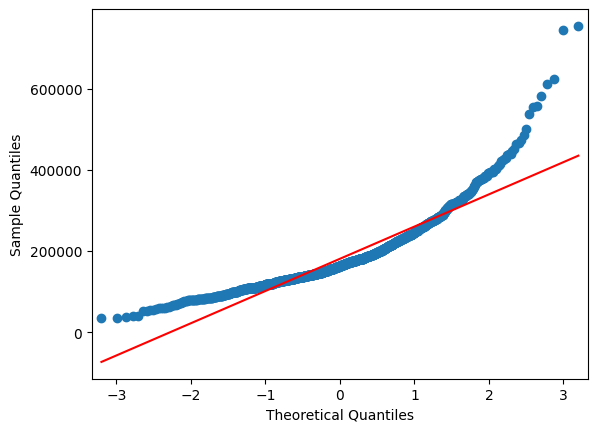

In [5]:
from scipy.stats import skew
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
skewness = skew(train['SalePrice'])
kurtosis = train['SalePrice'].kurt()
print(f'Kurtosis of SalePrice = {kurtosis}')
print(f'Skewness of SalePrice = {skewness}')
train['SalePrice'].describe()
fig_1 = px.histogram(train, x="SalePrice",histnorm="probability density")
fig_1.show()
# using statsmodels
from statsmodels.graphics.gofplots import qqplot

qqplot_data = qqplot(train['SalePrice'], line='s').gca().lines

* Transform SalePrice

In [7]:
"""
 Instaed of log() we are using log1p() 
 log1p() calculates log(1 + x), so it takes of issue of log(0) error 
 For reverse transformation just use expm1()    
"""
train['SalePrice'] = np.log1p(train['SalePrice'])

* Check again for normal distribution and probability plot

Kurtosis of SalePrice = 0.809519155707878
Skewness of SalePrice = 0.12122191311528359


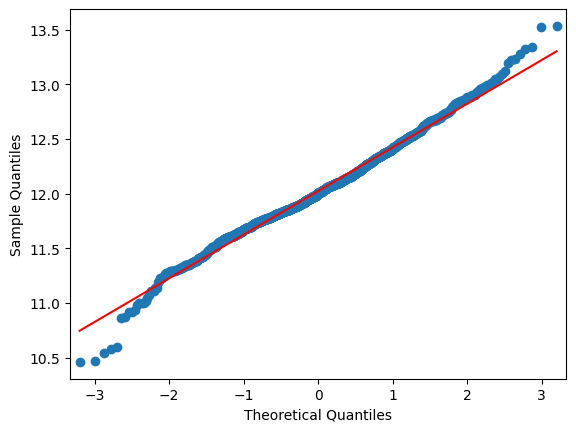

In [8]:
skewness = skew(train['SalePrice'])
kurtosis = train['SalePrice'].kurt()
print(f'Kurtosis of SalePrice = {kurtosis}')
print(f'Skewness of SalePrice = {skewness}')
train['SalePrice'].describe()
fig_1 = px.histogram(train, x="SalePrice",histnorm="probability density")
fig_1.show()
qqplot_data = qqplot(train['SalePrice'], line='s').gca().lines